# Worldwide Billionaire Analysis


References
- https://thecleverprogrammer.com/2021/06/24/billionaires-analysis-with-python/
- https://thecleverprogrammer.com/2021/02/09/best-data-sources-for-data-science-projects-and-case-studies/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
billionaires_data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Billionaire.csv")
billionaires_data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [4]:
billionaires_data.shape

(2755, 7)

In [5]:
billionaires_data.columns

Index(['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Age', 'Industry'], dtype='object')

In [6]:
billionaires_data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [7]:
billionaires_data.loc[billionaires_data.Age.isnull() == True]

,Name,NetWorth,Country,Source,Rank,Age,Industry
132,Hinduja brothers,$14.9 B,United Kingdom,diversified,133,NaN,Diversified
255,Lam Wai-ying,$9.1 B,Hong Kong,smartphone screens,256,NaN,Manufacturing
268,Chan Tan Ching-fen,$8.8 B,Hong Kong,real estate,269,NaN,Real Estate
285,Anthony von Mandl,$8.7 B,Canada,alcoholic beverages,274,NaN,Food & Beverage
294,Kuldip Singh & Gurbachan Singh Dhingra,$8.4 B,India,paints,294,NaN,Manufacturing
...,...,...,...,...,...,...,...
2580,Lai Baosheng,$1.1 B,China,consumer technology,2524,NaN,Technology
2639,Tseng Sing-ai,$1.1 B,Taiwan,petrochemicals,2524,NaN,Manufacturing
2680,Carmen Daurella Aguilera,$1 B,Spain,Coca-Cola bottler,2674,NaN,Food & Beverage
2714,Michael McCain,$1 B,Canada,packaged meats,2674,NaN,Food & Beverage


In [8]:
billionaires_data = billionaires_data.dropna()

In [9]:
billionaires_data.shape

(2676, 7)

In [10]:
billionaires_data.NetWorth = billionaires_data.NetWorth.str.strip("$")
billionaires_data.NetWorth = billionaires_data.NetWorth.str.strip("B")
billionaires_data.NetWorth = billionaires_data.NetWorth.astype(float)
billionaires_data.NetWorth.head(10)



0    177.0
1    151.0
2    150.0
3    124.0
4     97.0
5     96.0
6     93.0
7     91.5
8     89.0
9     84.5
Name: NetWorth, dtype: float64

In [11]:
top_10 = billionaires_data.sort_values(by='NetWorth', ascending=False).head(10)
top_10

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


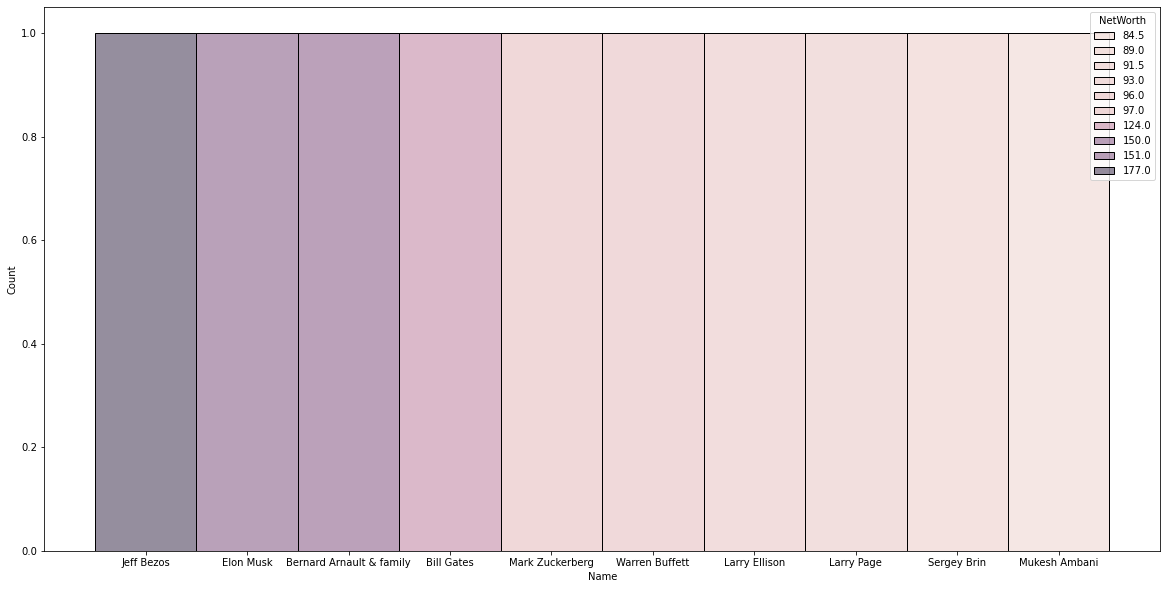

In [14]:
plt.figure(figsize=(20, 10))
sns.histplot(x='Name', hue='NetWorth', data=top_10)
plt.show()

#### Top 5 domains with most number of billionaires

In [23]:
top_5_domains = billionaires_data.Source.value_counts().head()
top_5_domains


real estate        169
pharmaceuticals     96
investments         89
diversified         78
software            61
Name: Source, dtype: int64

In [24]:
index = top_5_domains.index
sources = top_5_domains.values
index, sources

(Index(['real estate', 'pharmaceuticals', 'investments', 'diversified',
        'software'],
       dtype='object'),
 array([169,  96,  89,  78,  61], dtype=int64))

In [25]:
custom_colors = ['skyblue', 'yellowgreen', 'tomato', 'blue', 'red']

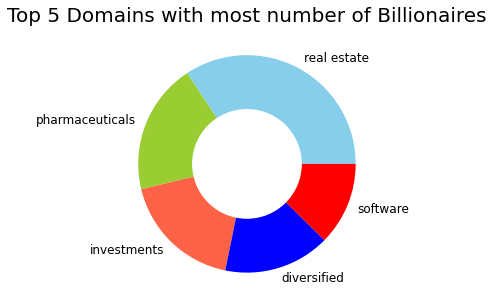

In [29]:
plt.figure(figsize=(5, 5))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Domains with most number of Billionaires", fontsize=20)
plt.show()

#### Top 5 industries with most number of billionaires

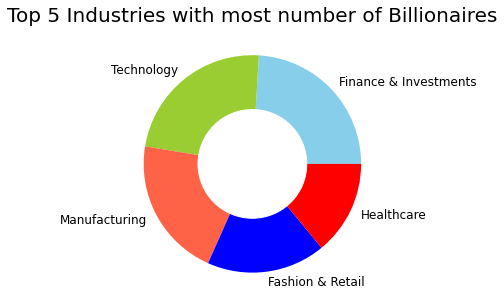

In [30]:
top_5_industries = billionaires_data.Industry.value_counts().head()
index = top_5_industries.index
sources = top_5_industries.values
custom_colors = ['skyblue', 'yellowgreen', 'tomato', 'blue', 'red']
plt.figure(figsize=(5, 5))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Industries with most number of Billionaires", fontsize=20)
plt.show()